In [4]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
from math import *

def plot_complex(axis, points, *args, **kwargs):
    axis.plot(np.real(points), np.imag(points), *args, **kwargs)
    
def scatter_complex(axis, points, *args, **kwargs):
    axis.scatter(np.real(points), np.imag(points), *args, **kwargs)

In [7]:
def solve(z0):
    while abs(z0) < 1e5 and abs(z0 * z0 * z0 - 1) > 1e-5:
        yield z0
        diff = (z0 * z0 * z0 - 1) / (2 * z0 * z0)
        if abs(diff) > 0.03:
            diff *= 0.03 / abs(diff)
        z0 -= diff

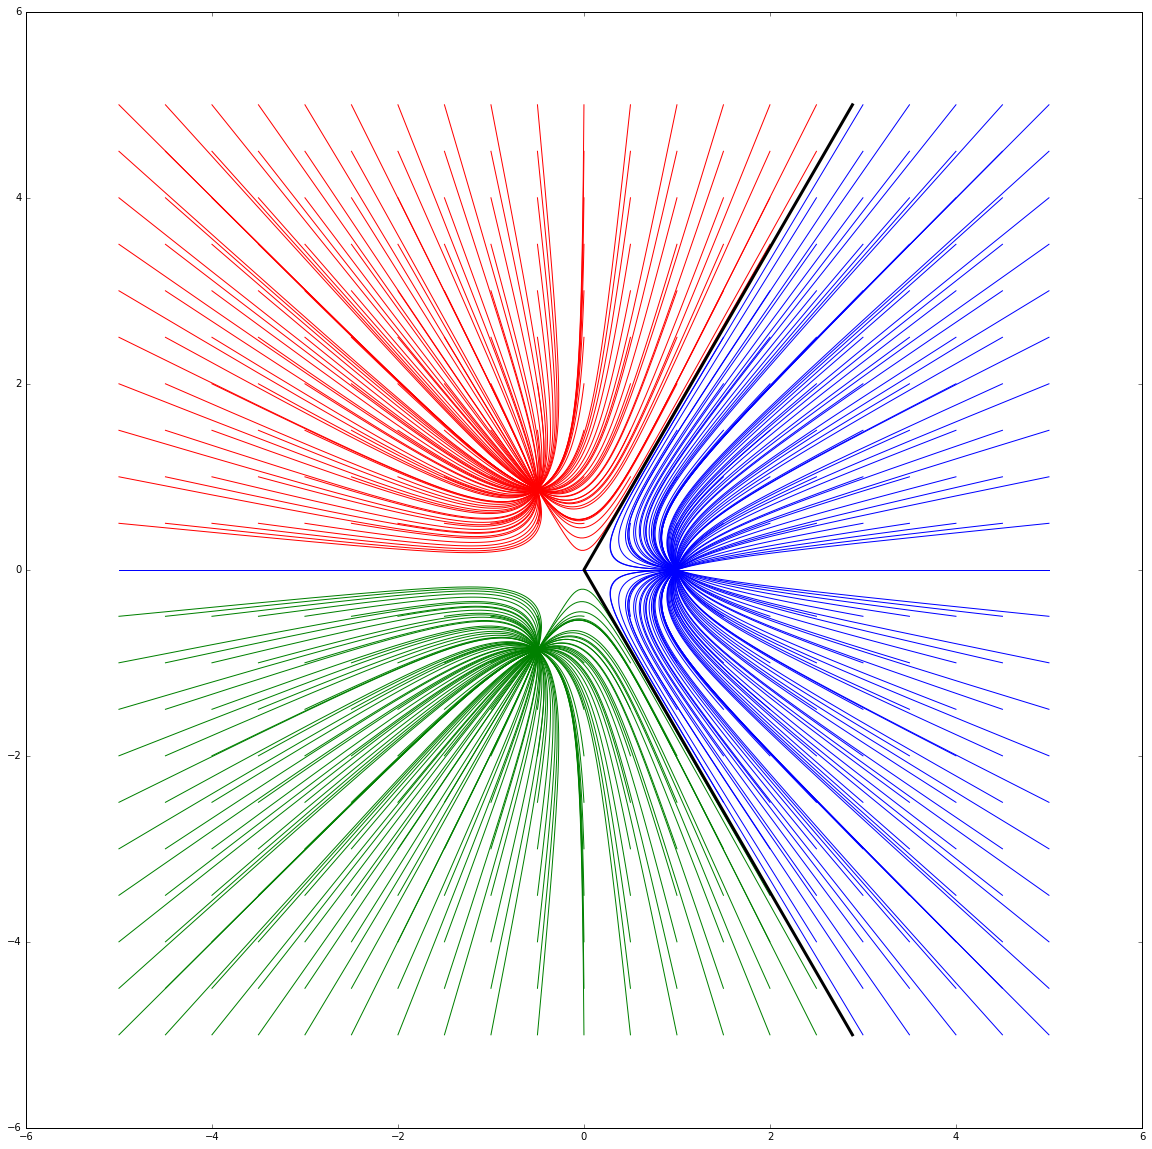

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))

for r in range(-10, 11):
    for i in range(-10, 11):
        pnt = (r + i * 1j) / 2
        if (pnt == 0):
            continue
        test = np.array(list(solve(pnt)))
        if len(test) == 0:
            continue
        result = test[-1]
        c = 'blue' if result.real > 0 else 'red' if result.imag > 0 else 'green'
        plot_complex(ax, test, color=c)
        
#fig.savefig('newton2.png')
ax.plot([5 / sqrt(3), 0, 5 / sqrt(3)], [-5, 0, 5], color='black', linewidth=3.0)

У жирной чёрной линии угол наклона отн. $\Re$ равен $\frac{pi}{3}$. Легко убедиться, что из значения на любом из этих лучей наблюдалась бы сходимость к корню на его продолжении:
$$x_{i+1} = k \cdot (1 + \sqrt{3}i) + \frac{8k^3 - 1}{4k^2 \cdot (-1 + \sqrt{3}i)} = k' \cdot (1 + \sqrt{3}i)$$
TODO а почему сходиться-то именно будет?